<a href="https://colab.research.google.com/github/bagusswahasdwikaa/24_3H_Pembelajaran-Mesin-2024/blob/main/24_Sukma_Bagus_Wahasdwika_3H_Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

 Mengubah tingkat kecerahan citra 
----------------------------------
Masukkan nilai kecerahan: 50


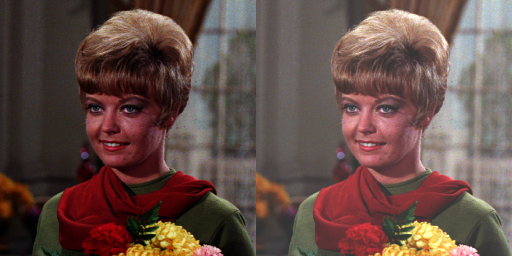

In [ ]:
print(' Mengubah tingkat kecerahan citra ')
print('----------------------------------')
try:
  brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK/Images /female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

#akses per pixel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)

#cara simple tanpa for loop
#brightness_image = cv.covertScaleAbs(original, beta=brightness)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

**TUGAS PRAKTIKUM**
1. Implementasikan inverse citra pada Google Colaboratory menggunakan formula yang terdapat pada bagian Ulasan Teori, sehingga menghasilkan keluaran seperti berikut:

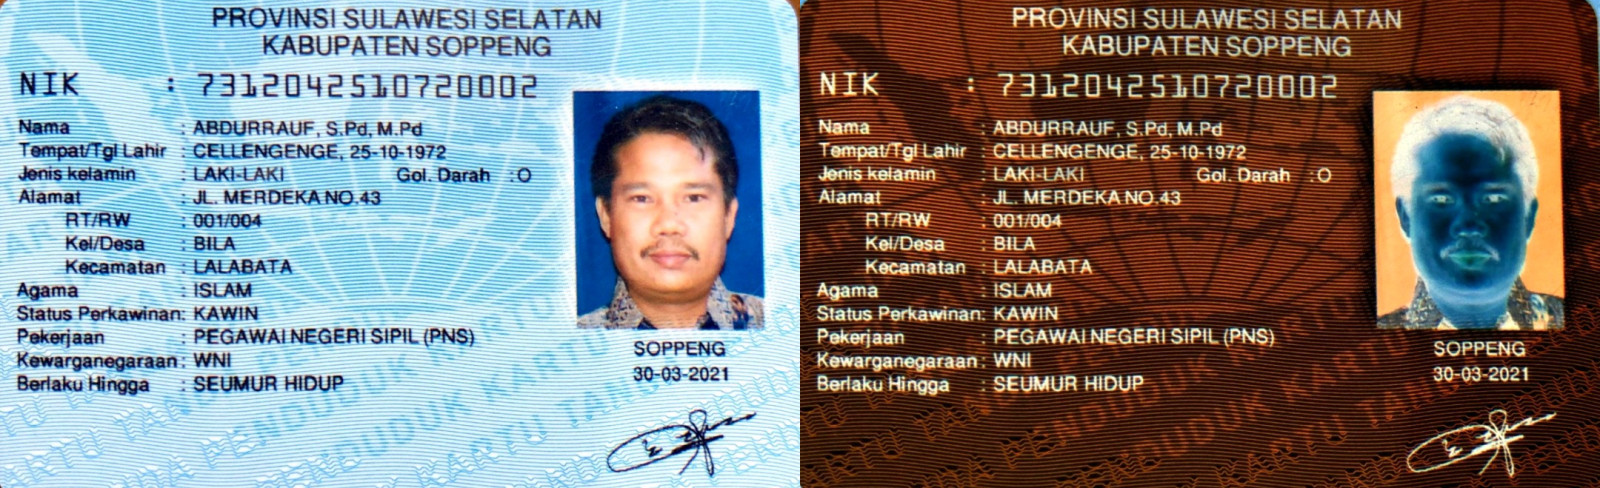

In [ ]:
original_ktp = cv.imread('/content/drive/MyDrive/PCVK/KTP/KTP.jpeg')
inverse_ktp = 255 - original_ktp

# Gabungkan gambar asli dan inverse secara horizontal
gabungan_ktp = cv.hconcat([original_ktp, inverse_ktp])

# Tampilkan gambar gabungan
cv2_imshow(gabungan_ktp)  # Menampilkan kedua gambar secara sejajar


2. Implementasikan transformasi contrast pada Google Colaboratory menggunakan
formula yang terdapat pada bagian Ulasan Teori untuk kontras, sehingga
menghasilkan keluaran seperti berikut:


Mengubah kontras dan tingkat kecerahan citra
----------------------------------
Masukkan tingkat kecerahan [-255 - 255]: 50
Masukkan tingkat kontras [1.0 - 3.0]: 2


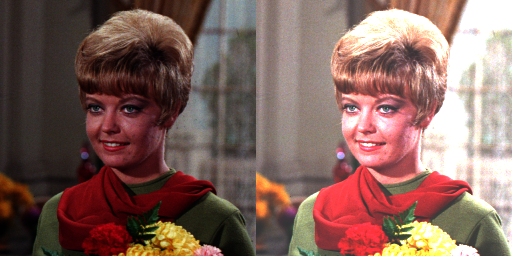

In [3]:
print('Mengubah kontras dan tingkat kecerahan citra') #Menampilkan judul dan garis pemisah untuk memberikan konteks kepada pengguna tentang apa yang akan dilakukan oleh program.
print('----------------------------------')
try:
    brightness = int(input('Masukkan tingkat kecerahan [-255 - 255]: '))  #Meminta pengguna untuk memasukkan nilai tingkat kecerahan dan kontras.
    kontras = float(input('Masukkan tingkat kontras [1.0 - 3.0]: '))      #Jika input tidak valid (misalnya, bukan angka), program akan menangkap kesalahan dan menampilkan pesan error, lalu keluar dari program.
except ValueError as e:
    print(f'Error: {e}')
    exit()

# Membaca citra
original = cv.imread('/content/drive/MyDrive/PCVK/Images /female.tiff')  # Ganti dengan path ke citra Anda

# Mengatur kontras dan kecerahan citra menggunakan fungsi cv2.convertScaleAbs.
# Parameter alpha mengatur faktor pengali kontras, sedangkan beta mengatur penambah kecerahan.
adjusted_image = cv.convertScaleAbs(original, alpha=kontras, beta=brightness)

# Menampilkan citra asli dan citra yang disesuaikan
final_frame = cv.hconcat((original, adjusted_image)) # Menggabungkan citra asli dan citra yang telah disesuaikan secara horizontal untuk memudahkan perbandingan.

# Menampilkan hasil
from google.colab.patches import cv2_imshow
cv2_imshow(final_frame)

3. Implementasikan transformasi logarithmic brightness pada Google Colaboratory menggunakan formula yang terdapat pada bagian Ulasan Teori untuk transformasi log, sehingga menghasilkan keluaran seperti berikut:

Mengubah tingkat kecerahan citra dengan Transformasi Log
----------------------------------
Masukkan nilai kecerahan: 50


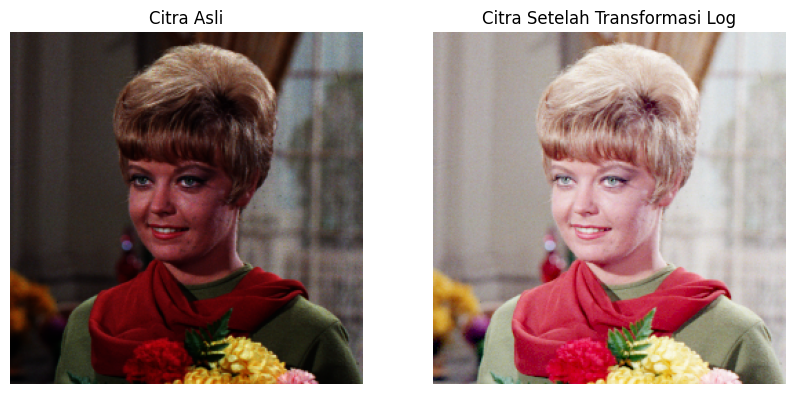

In [4]:
# Cetak header / Judul
print('Mengubah tingkat kecerahan citra dengan Transformasi Log')
print('----------------------------------')

# Input nilai kecerahan
brightness = float(input('Masukkan nilai kecerahan: '))

image = cv.imread('/content/drive/MyDrive/PCVK/Images /female.tiff')

# Mengonversi citra menjadi tipe data float32, yang diperlukan untuk melakukan perhitungan dengan presisi lebih tinggi saat transformasi log.
image = image.astype(np.float32)

# Memisahkan citra berwarna menjadi tiga channel (BGR), sehingga transformasi logaritmik dapat diterapkan secara terpisah pada setiap channel.
channels = cv.split(image)

# Melakukan transformasi logaritmik pada setiap channel dengan rumus log1p, yang merupakan transformasi log(1 + pixel_value) untuk menghindari masalah log(0).
# Faktor brightness digunakan untuk mengatur seberapa kuat efek transformasi log pada setiap channel.
channels = [brightness * np.log1p(channel) for channel in channels]

# Menggabungkan kembali channel-channel yang telah diubah melalui transformasi log menjadi satu citra utuh.
log_transformed = cv.merge(channels)

# Menormalisasi hasil citra setelah transformasi log sehingga nilai pikselnya berada dalam rentang 0 hingga 255, sesuai dengan rentang piksel citra 8-bit standar.
log_transformed = cv.normalize(log_transformed, None, 0, 255, cv.NORM_MINMAX)

# Mengonversi citra kembali ke format uint8, format standar untuk citra, yang memiliki rentang piksel 0-255.
log_transformed = log_transformed.astype(np.uint8)

# Membuat figure baru dengan ukuran 10x5 inci, yang akan menampilkan citra asli dan citra hasil transformasi log secara berdampingan.
plt.figure(figsize=(10, 5))

# Menampilkan citra asli pada subplot pertama.
# Citra diubah dari format BGR (standar OpenCV) menjadi RGB (standar matplotlib) untuk visualisasi yang benar.
# Label sumbu dinonaktifkan (plt.axis('off')).
plt.subplot(1, 2, 1)
plt.title('Citra Asli')
plt.imshow(cv.cvtColor(image.astype(np.uint8), cv.COLOR_BGR2RGB))  # Ubah BGR ke RGB untuk ditampilkan
plt.axis('off')

# Menampilkan citra hasil transformasi log pada subplot kedua, juga diubah dari BGR ke RGB untuk visualisasi.
plt.subplot(1, 2, 2)
plt.title('Citra Setelah Transformasi Log')
plt.imshow(cv.cvtColor(log_transformed, cv.COLOR_BGR2RGB))  # Ubah BGR ke RGB untuk ditampilkan
plt.axis('off')

plt.show()
